# Graph
[Draw] graphs using the [ForceAtlas2] energy model. Graphs can be [directed] and/or [weighted].

For an example, see [7 Degrees of Martin Brundle].


[Draw]: https://en.wikipedia.org/wiki/Graph_drawing
[ForceAtlas2]: https://doi.org/10.1371/journal.pone.0098679
[directed]: https://en.wikipedia.org/wiki/Directed_graph
[weighted]: https://en.wikipedia.org/wiki/Glossary_of_graph_theory#weighted_graph
[7 Degrees of Martin Brundle]: https://brundling.neocities.org/

In [1]:
from graph import GraphFrame
from plot import Plotter

## build a GraphFrame
GraphFrame can import and export several different graph data structures.

Internally, each graph is stored as a DataFrame with 3 columns: `source`, `target`, `weight`.

For example, if the node named `a` points to the node named `b` with weight 0.1, that information is stored as the row `('a', 'b', 0.1)`.

[directed graph]: https://en.wikipedia.org/wiki/Directed_graph

### from triples
This example graph is a tuple of links as (source, target, weight) tuples.

In [2]:
triples = (
    ('alice', 'bob', 2),
    ('alice', 'carol', 1),
    ('bob', 'alice', 1),
    ('bob', 'carol', 1),
    ('carol', 'alice', 1),
)
graph = GraphFrame(triples)
graph

GraphFrame with 5 links
  source target  weight
0  alice    bob       2
1  alice  carol       1
2    bob  alice       1
3    bob  carol       1
4  carol  alice       1

### from pairs
Each (source, target) pair will be assigned a weight: how many times it appears.

In [3]:
pairs = (
    ('alice', 'bob'),
    ('alice', 'bob'),
    ('alice', 'carol'),
    ('bob', 'alice'),
    ('bob', 'carol'),
    ('carol', 'alice'),
)
GraphFrame(pairs)

GraphFrame with 5 links
  source target  weight
0  alice    bob       2
1  alice  carol       1
2    bob  alice       1
3    bob  carol       1
4  carol  alice       1

### from sources
This example is a mapping from nodes to their sources. Each key's value is a list of nodes which point to that key.

In [4]:
sources = dict()
sources['alice'] = ['bob', 'carol']
sources['bob'] = ['alice', 'alice']
sources['carol'] = ['alice','bob']
GraphFrame.from_sources(sources)

GraphFrame with 5 links
  source target  weight
0  alice    bob       2
1  alice  carol       1
2    bob  alice       1
3    bob  carol       1
4  carol  alice       1

### from targets

This example is a mapping from nodes to their targets. Each key's value is a list of nodes to which that key points.

In [5]:
targets = dict()
targets['alice'] = ['bob', 'bob', 'carol']
targets['bob'] = ['alice', 'carol']
targets['carol'] = ['alice']
GraphFrame.from_targets(targets)

GraphFrame with 5 links
  source target  weight
0  alice    bob       2
1  alice  carol       1
2    bob  alice       1
3    bob  carol       1
4  carol  alice       1

## export graph attributes

In [6]:
# Access the internal DataFrame directly
graph.links

,source,target,weight
0,alice,bob,2
1,alice,carol,1
2,bob,alice,1
3,bob,carol,1
4,carol,alice,1


In [7]:
# links as a SciPy sparse adjacency matrix
graph.matrix

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [8]:
# links as a NumPy adjacency matrix
graph.matrix.toarray()

array([[0, 2, 1],
       [1, 0, 1],
       [1, 0, 0]])

In [9]:
# list of all distinct nodes
graph.nodes

['alice', 'bob', 'carol']

In [10]:
# Series of weights for each distinct (source, target)
graph.weights

source  target
alice   bob       2
        carol     1
bob     alice     1
        carol     1
carol   alice     1
Name: weight, dtype: int64

## iterate over a graph

In [11]:
# rows as namedtuples
for x in graph:
    print(x)

Link(source='alice', target='bob', weight=2)
Link(source='alice', target='carol', weight=1)
Link(source='bob', target='alice', weight=1)
Link(source='bob', target='carol', weight=1)
Link(source='carol', target='alice', weight=1)


In [12]:
# rows as [source, target, weight] lists
[list(x) for x in graph]

[['alice', 'bob', 2],
 ['alice', 'carol', 1],
 ['bob', 'alice', 1],
 ['bob', 'carol', 1],
 ['carol', 'alice', 1]]

In [13]:
# list distinct [source, target] pairs without weights
[ [s,t] for s,t in graph.pairs() ]

[['alice', 'bob'],
 ['alice', 'carol'],
 ['bob', 'alice'],
 ['bob', 'carol'],
 ['carol', 'alice']]

In [14]:
# dict from each target to a list of its sources
{x:y for x,y in graph.sources()}

{'alice': ['bob', 'carol'], 'bob': ['alice'], 'carol': ['alice', 'bob']}

In [15]:
# dict from each source to a list of its targets
{x:y for x,y in graph.targets()}

{'alice': ['bob', 'carol'], 'bob': ['alice', 'carol'], 'carol': ['alice']}

# UNDER CONSTRUCTION

In [16]:
%load_ext autoreload
%autoreload all
from graph import *

## calculate layout

In [17]:
show = Plotter()
show.params["figure"]["figsize"] = (4,4)

In [18]:
graph.layout(100)

,x,y
alice,0.029500,-0.202898
bob,-0.337478,0.172988
carol,0.431268,0.330672


<Axes: >

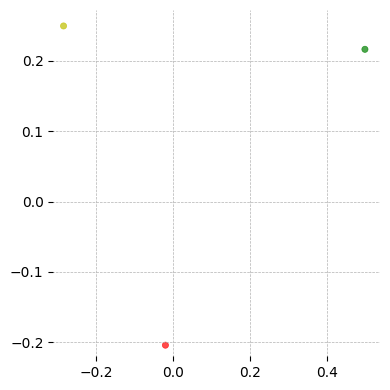

In [19]:
points = graph.layout()
points['color'] = list('ryg')
show.scatter(points)

## show layout steps

In [20]:
from pandas import DataFrame

data = DataFrame(index=graph.nodes)
data['x'] = data['y'] = 0
data['color'] = list('ryg')
data

,x,y,color
alice,0,0,r
bob,0,0,y
carol,0,0,g


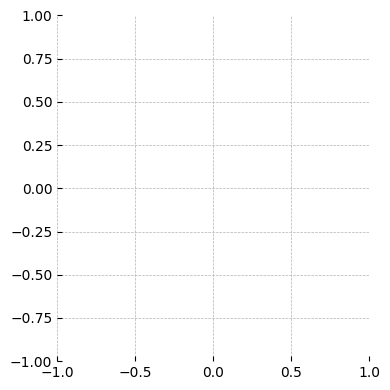

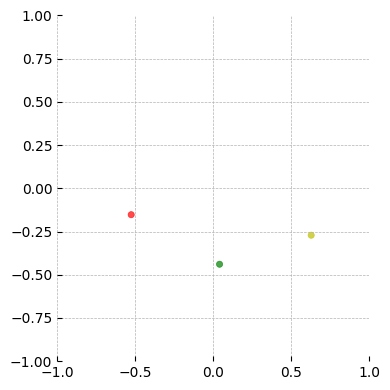

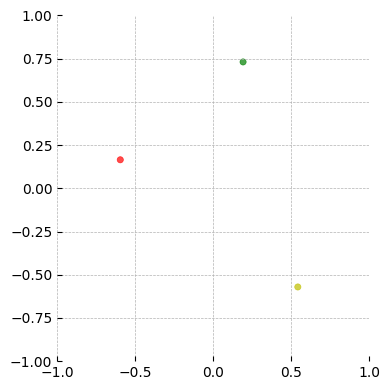

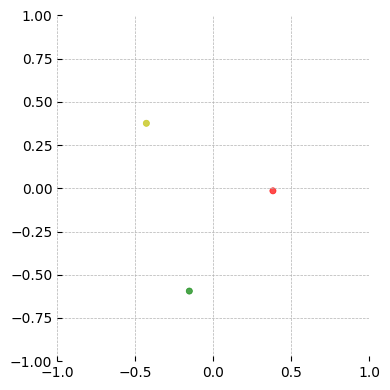

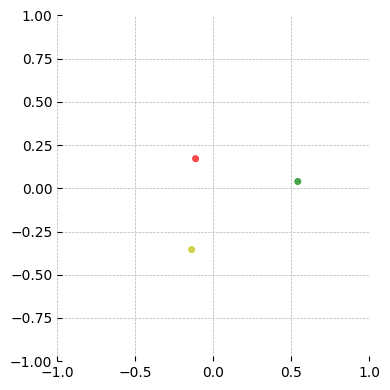

In [21]:
points = enumerate(graph(100))
points = ( z for i, z in points if not i % 20 )
for x, y in points:
    data['x'] = x
    data['y'] = y
    axes = show.scatter(data, xlim=(-1, 1), ylim=(-1, 1))

## help

In [22]:
help(GraphFrame)

Help on class GraphFrame in module graph:

class GraphFrame(builtins.object)
 |  GraphFrame(links)
 |  
 |  Force-directed graph layout based on Gephi's ForceAtlas2 model.
 |  
 |  Initialize with any valid DataFrame input with 2 or 3 columns.
 |  Graph stores links as a DataFrame with 3 columns: source, target, weight.
 |  If input has 2 columns, then each row is assigned weight 1.
 |  Weights for duplicated (node, node) pairs are summed.
 |  
 |  Call with a number of timesteps to return two NumPy arrays (x, y).
 |  Call accepts optional starting coordinates as 'x', 'y' keyword arguments.
 |  Coordinates are typically, but not always, in the range [-1, 1].
 |  
 |  Iterating over a Graph returns rows as namedtuples.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, nsteps, x=(), y=())
 |      Call self as a function.
 |  
 |  __init__(self, links)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  __len__(self)
 |  
 |  __repr